# Pymaceuticals Inc.
---

### Insights into Drug Regimens and Tumor Development in SCC Mice: Evaluating Capomulin's Effectiveness and Correlations

Summary:
This comprehensive data analysis report, conducted by Pymaceuticals, Inc., investigates the performance and trends observed in a dataset comprising nearly equal numbers of male and female mice diagnosed with SCC tumors. The study evaluates various drug regimens administered to the mice over a 45-day period, with a focus on comparing the effectiveness of Capomulin, a Pymaceuticals' drug of interest, against other treatments. 

Key findings include:
- Among the ten drug regimens examined, four treatments (Capomulin, Ramicane, Infubinol, and Ceftamin) demonstrated statistically significant results. Ramicane and Capomulin exhibited the lowest tumor volume, highlighting their potential effectiveness in reducing tumor size.
- Capomulin and Ramicane had a slightly higher number of observed mouse time points compared to other drugs, indicating more comprehensive data coverage for these treatments.
- The final tumor volume analysis revealed that Ramicane and Capomulin had minimal outliers, ensuring higher reliability and accuracy of conclusions drawn regarding treatment efficacy.
- The study identified a positive correlation (r-value of 0.84) between average tumor volume and mouse weight, suggesting that tumor volume can be effectively predicted based on mouse weight.

This analysis provides valuable insights into the effectiveness of various drug regimens, with a focus on Capomulin, in treating SCC tumors. The correlations and observations derived from the study contribute to our understanding of tumor development and offer potential avenues for further research and treatment refinement.

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "outer")

# Display the data table for preview
merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [22]:
# Checking the number of mice.
merge["Mouse ID"].nunique()

249

In [23]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
a = merge.groupby(["Mouse ID", "Timepoint"])["Mouse ID"].count()
a.loc[a>1].index[0][0]

'g989'

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
## These are observations where mouse Id and timepoint were not unique.
merge[merge.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index = merge.loc[merge["Mouse ID"] == "g989", :].index
data = merge.drop(index = index)
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [26]:
# Checking the number of mice in the clean DataFrame.
data["Mouse ID"].nunique()

248

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean().to_frame(name = "Mean Tumor Volume")
median = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median().to_frame(name = "Median  Tumor Volume")
var = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var().to_frame(name = "Tumor Volume Variance")
std = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std().to_frame(name = "Tumor Volume Std. Dev.")
SEM = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem().to_frame(name = "Tumor Volume Std. Err.")
summary = pd.merge(mean, median, left_index = True, right_index = True)
summary = pd.merge(summary, var, left_index = True, right_index = True)
summary = pd.merge(summary, std, left_index = True, right_index = True)
summary = pd.merge(summary, SEM, left_index = True, right_index = True)
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation = data.groupby("Drug Regimen")["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std", "sem"])
aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

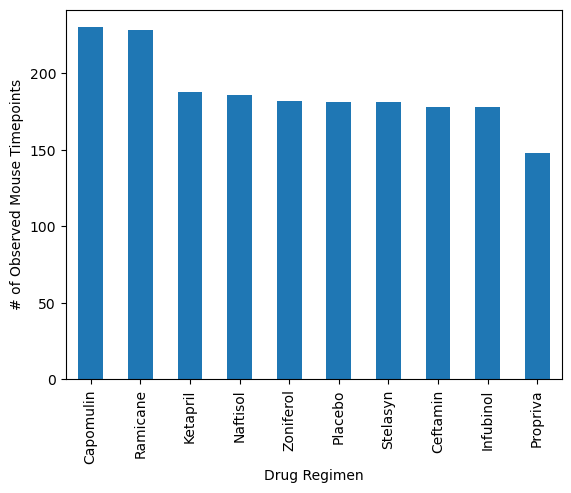

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each egimen using Pandas.
bar = data.groupby("Drug Regimen")["Mouse ID"].count().to_frame()
bar = bar.reset_index().sort_values(by = "Mouse ID", ascending = False)
bar.plot(x= "Drug Regimen", y = "Mouse ID",  kind = "bar", legend = False,xlabel ="Drug Regimen"  , ylabel = "# of Observed Mouse Timepoints")


Text(0, 0.5, '# of Observed Mouse Timepoints')

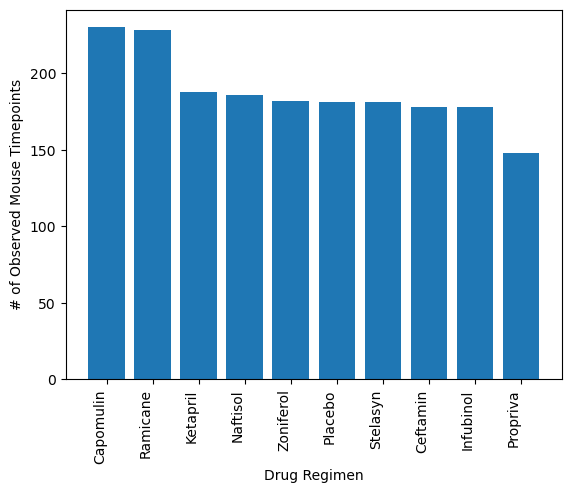

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(bar["Drug Regimen"], bar["Mouse ID"])
plt.xticks(rotation=90, ha='right')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

<Axes: ylabel='Sex'>

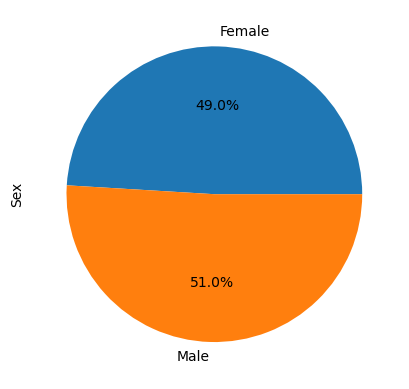

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = data.groupby("Sex")["Mouse ID"].count().to_frame()
pie.plot(kind = "pie", y = "Mouse ID", ylabel = "Sex", autopct = "%1.1f%%" , legend = False)

Text(0, 0.5, 'Sex')

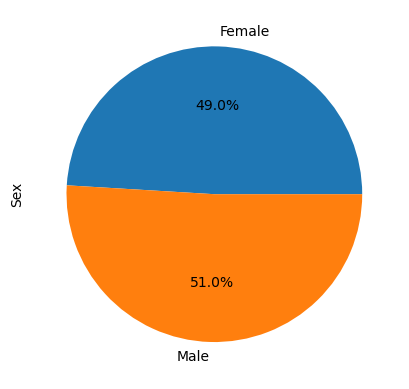

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pie["Mouse ID"], labels = ["Female", "Male"], autopct = "%1.1f%%" )
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_tumor = data.sort_values(by = "Timepoint").groupby("Mouse ID")["Tumor Volume (mm3)"].last().to_frame().reset_index()
final_tumor = final_tumor.rename(columns = {"Tumor Volume (mm3)" : "Final Tumor Volume"})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
data = pd.merge(data , final_tumor, on= "Mouse ID", how = "outer" )
data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume
0,b128,0,45.000000,0,Capomulin,Female,9,22,38.982878
1,b128,5,45.651331,0,Capomulin,Female,9,22,38.982878
2,b128,10,43.270852,0,Capomulin,Female,9,22,38.982878
3,b128,15,43.784893,0,Capomulin,Female,9,22,38.982878
4,b128,20,42.731552,0,Capomulin,Female,9,22,38.982878


In [34]:
# Put treatments into a list for for loop (and later for plot labels)
data2 = data.groupby("Mouse ID")[["Mouse ID", "Drug Regimen", "Final Tumor Volume"]].tail(1)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.            
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
sub_drug = []
outliers = []

for t in treatment:
    sub_drug.append(data2.loc[data["Drug Regimen"] == t , ["Final Tumor Volume"]].reset_index(drop=True))
    
for s in sub_drug:
    Q1 = s.quantile(.25)
    Q3 = s.quantile(.75)  
    IQR = Q3 - Q1
    x = 1.5*IQR
    outliers.append(s[(s < (Q1 - x)) |  (s > (Q3 + x))].dropna())
    

for x in outliers:
    for y in x:
        print(f"{y}'s potential outliers : {x[y]}")
        print("-----------------------------------------------")


Final Tumor Volume's potential outliers : Series([], Name: Final Tumor Volume, dtype: float64)
-----------------------------------------------
Final Tumor Volume's potential outliers : Series([], Name: Final Tumor Volume, dtype: float64)
-----------------------------------------------
Final Tumor Volume's potential outliers : 0    36.321346
Name: Final Tumor Volume, dtype: float64
-----------------------------------------------
Final Tumor Volume's potential outliers : Series([], Name: Final Tumor Volume, dtype: float64)
-----------------------------------------------


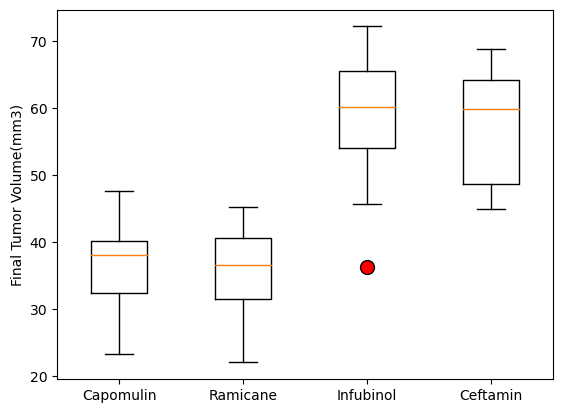

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

Capomulin = sub_drug[0].loc[: , "Final Tumor Volume"]
Ramicane = sub_drug[1].loc[: , "Final Tumor Volume"]
Infubinol = sub_drug[2].loc[: , "Final Tumor Volume"]
Ceftamin = sub_drug[3].loc[: , "Final Tumor Volume"]

fig, ax = plt.subplots()
ax.boxplot(x = [Capomulin, Ramicane, Infubinol, Ceftamin] , labels = treatment, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
ax.set(ylabel="Final Tumor Volume(mm3)")

plt.show()



## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment of mouse f966'}, xlabel='Timepoint(day)', ylabel='Tumor Volume (mm3)'>

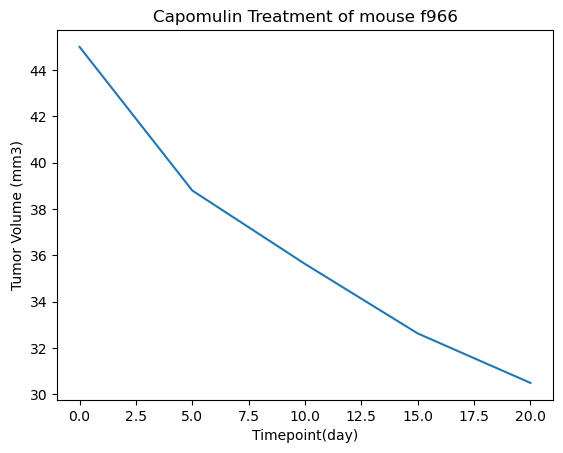

In [36]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mId = data.loc[data["Drug Regimen"] == "Capomulin", ["Mouse ID"]].sample()["Mouse ID"].tolist()[0]
sample = data.loc[data["Mouse ID"] == mId, ["Timepoint", "Tumor Volume (mm3)"]]
sample.plot(kind = "line",x = "Timepoint", y = "Tumor Volume (mm3)", xlabel = "Timepoint(day)",
            ylabel = "Tumor Volume (mm3)", title = f"Capomulin Treatment of mouse {mId}", legend = False)


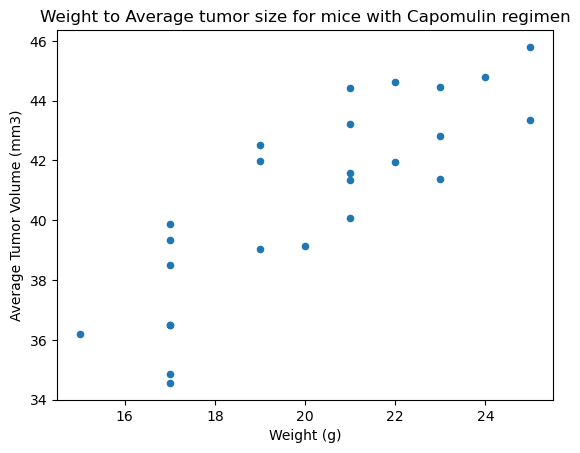

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_tumor = data.loc[data["Drug Regimen"] == "Capomulin", ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)" ]]
weight_tumor = weight_tumor.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean()
weight_tumor.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", xlabel = "Weight (g)",
                  ylabel = "Average Tumor Volume (mm3)", title= "Weight to Average tumor size for mice with Capomulin regimen")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


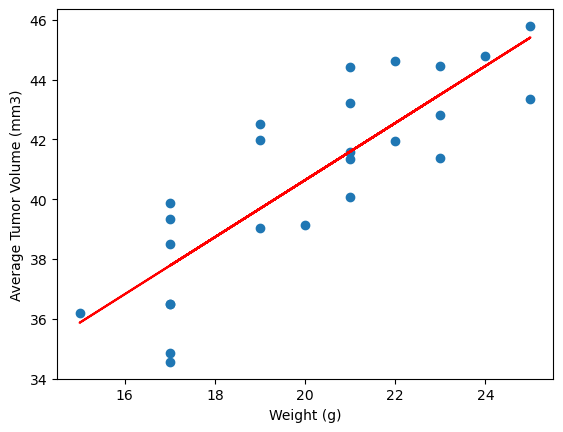

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = weight_tumor["Weight (g)"]
y_values = weight_tumor["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")
plt.show()